In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('Alzheimers dataset.csv')

# Displaying the first few rows of the dataset to get an overview
data.head()

,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,...,Alcohol Occasional Use,Alcohol Frequency,Alcohol Consumption,Alcohol Dementia,Alcohol-Induced Dementia,Alcohol Abuse,Family History of Cognitive Decline,Other Biomarkers,Other Biomarker Details,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,...,1,2,0,0,7,8,0,0,NaN,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,...,-4,-4,0,0,7,-4,1,-4,NaN,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,...,-4,-4,-4,0,7,8,0,0,NaN,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,...,-4,-4,0,8,8,-4,0,-4,NaN,-4.0


In [4]:
# Checking the shape of the dataset
print(f"Dataset Shape: {data.shape}")

Dataset Shape: (19209, 58)


In [5]:
#coloumns of the dataset
data.columns

Index(['Birth Year', 'Sex', 'Years of Education',
       'Cognitive Decline due to Cardiovascular Issues',
       'Cognitive Decline due to Stroke', 'Memory Score',
       'Decision-Making Cognitive Decline', 'Cognitive Memory Assessment',
       'Cognitive Orientation Assessment', 'Cognitive Judgment Assessment',
       'Cognitive Language Assessment', 'Cognitive Visual Assessment',
       'Cognitive Attention Assessment', 'Cognitive Fluctuations',
       'Cognitive Flag Ongoing', 'Other Cognitive Symptoms',
       'Other Cognitive Symptoms Explanation', 'NACC Cognitive Function',
       'Cognitive Mode', 'Cognitive Mode Explanation', 'MMSE Completion',
       'MMSE Location', 'MMSE Language', 'MMSE Language Explanation',
       'MMSE Vision', 'MMSE Hearing', 'MMSE Orientation Date',
       'MMSE Orientation Location', 'NACC MMSE Score', 'Cognitive Status',
       'Normal Cognitive Function', 'Other Cognitive Function',
       'Other Cognitive Function Identified',
       'Other Cogni

In [6]:
#information about the dataset 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209 entries, 0 to 19208
Data columns (total 58 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      19209 non-null  int64  
 1   Sex                                             19209 non-null  int64  
 2   Years of Education                              19209 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  19209 non-null  int64  
 4   Cognitive Decline due to Stroke                 19209 non-null  int64  
 5   Memory Score                                    19209 non-null  float64
 6   Decision-Making Cognitive Decline               19209 non-null  int64  
 7   Cognitive Memory Assessment                     19209 non-null  int64  
 8   Cognitive Orientation Assessment                19209 non-null  int64  
 9   Cognitive Judgment Assessment          

In [7]:
# Columns to keep for Alzheimer's disease prediction
columns_to_keep = [
    'Birth Year',               # Proxy for age
    'Sex',                      # Gender could influence cognitive decline
    'Years of Education',       # Education might impact cognitive health
    'Cognitive Decline due to Cardiovascular Issues',
    'Cognitive Decline due to Stroke',
    'Memory Score',             # Core cognitive indicator
    'Decision-Making Cognitive Decline',
    'Cognitive Memory Assessment',
    'Cognitive Orientation Assessment',
    'Cognitive Judgment Assessment',
    'Family History of Cognitive Decline', # Genetic predisposition
    'Other Biomarkers',         # Biological markers can provide insights
    'Neuropsychological Genetics'
]

# Removing unnecessary columns
df = data[columns_to_keep]

# Display the cleaned dataset with only relevant columns
df.head()



,Birth Year,Sex,Years of Education,Cognitive Decline due to Cardiovascular Issues,Cognitive Decline due to Stroke,Memory Score,Decision-Making Cognitive Decline,Cognitive Memory Assessment,Cognitive Orientation Assessment,Cognitive Judgment Assessment,Family History of Cognitive Decline,Other Biomarkers,Neuropsychological Genetics
0,1939,2,16,-4,-4,0.5,1,1,0,1,0,0,-4.0
1,1944,1,18,-4,-4,0.5,1,1,0,1,0,0,-4.0
2,1956,2,10,1,0,2.0,-4,1,-4,1,1,-4,-4.0
3,1924,2,14,-4,-4,2.0,1,1,1,1,0,0,-4.0
4,1950,1,16,8,8,0.0,-4,0,-4,0,0,-4,-4.0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values: \n{missing_values}")

Missing Values: 
Birth Year                                           0
Sex                                                  0
Years of Education                                   0
Cognitive Decline due to Cardiovascular Issues       0
Cognitive Decline due to Stroke                      0
Memory Score                                         0
Decision-Making Cognitive Decline                    0
Cognitive Memory Assessment                          0
Cognitive Orientation Assessment                     0
Cognitive Judgment Assessment                        0
Family History of Cognitive Decline                  0
Other Biomarkers                                     0
Neuropsychological Genetics                       2712
dtype: int64


In [9]:
# Impute missing values in 'Neuropsychological Genetics' with the median
df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(
    df['Neuropsychological Genetics'].median())

# Check if the missing values have been imputed
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


Birth Year                                        0
Sex                                               0
Years of Education                                0
Cognitive Decline due to Cardiovascular Issues    0
Cognitive Decline due to Stroke                   0
Memory Score                                      0
Decision-Making Cognitive Decline                 0
Cognitive Memory Assessment                       0
Cognitive Orientation Assessment                  0
Cognitive Judgment Assessment                     0
Family History of Cognitive Decline               0
Other Biomarkers                                  0
Neuropsychological Genetics                       0
dtype: int64


/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_95068/3314800443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neuropsychological Genetics'] = df['Neuropsychological Genetics'].fillna(


In [10]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows in the dataset before removal:")
duplicates_before = df.duplicated().sum()
print(duplicates_before)

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Check for duplicates again to confirm removal
print("\nNumber of duplicate rows in the dataset after removal:")
duplicates_after = df_cleaned.duplicated().sum()
print(duplicates_after)


Number of duplicate rows in the dataset before removal:
5973

Number of duplicate rows in the dataset after removal:
0


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13236 entries, 0 to 19206
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Birth Year                                      13236 non-null  int64  
 1   Sex                                             13236 non-null  int64  
 2   Years of Education                              13236 non-null  int64  
 3   Cognitive Decline due to Cardiovascular Issues  13236 non-null  int64  
 4   Cognitive Decline due to Stroke                 13236 non-null  int64  
 5   Memory Score                                    13236 non-null  float64
 6   Decision-Making Cognitive Decline               13236 non-null  int64  
 7   Cognitive Memory Assessment                     13236 non-null  int64  
 8   Cognitive Orientation Assessment                13236 non-null  int64  
 9   Cognitive Judgment Assessment               

# EDA

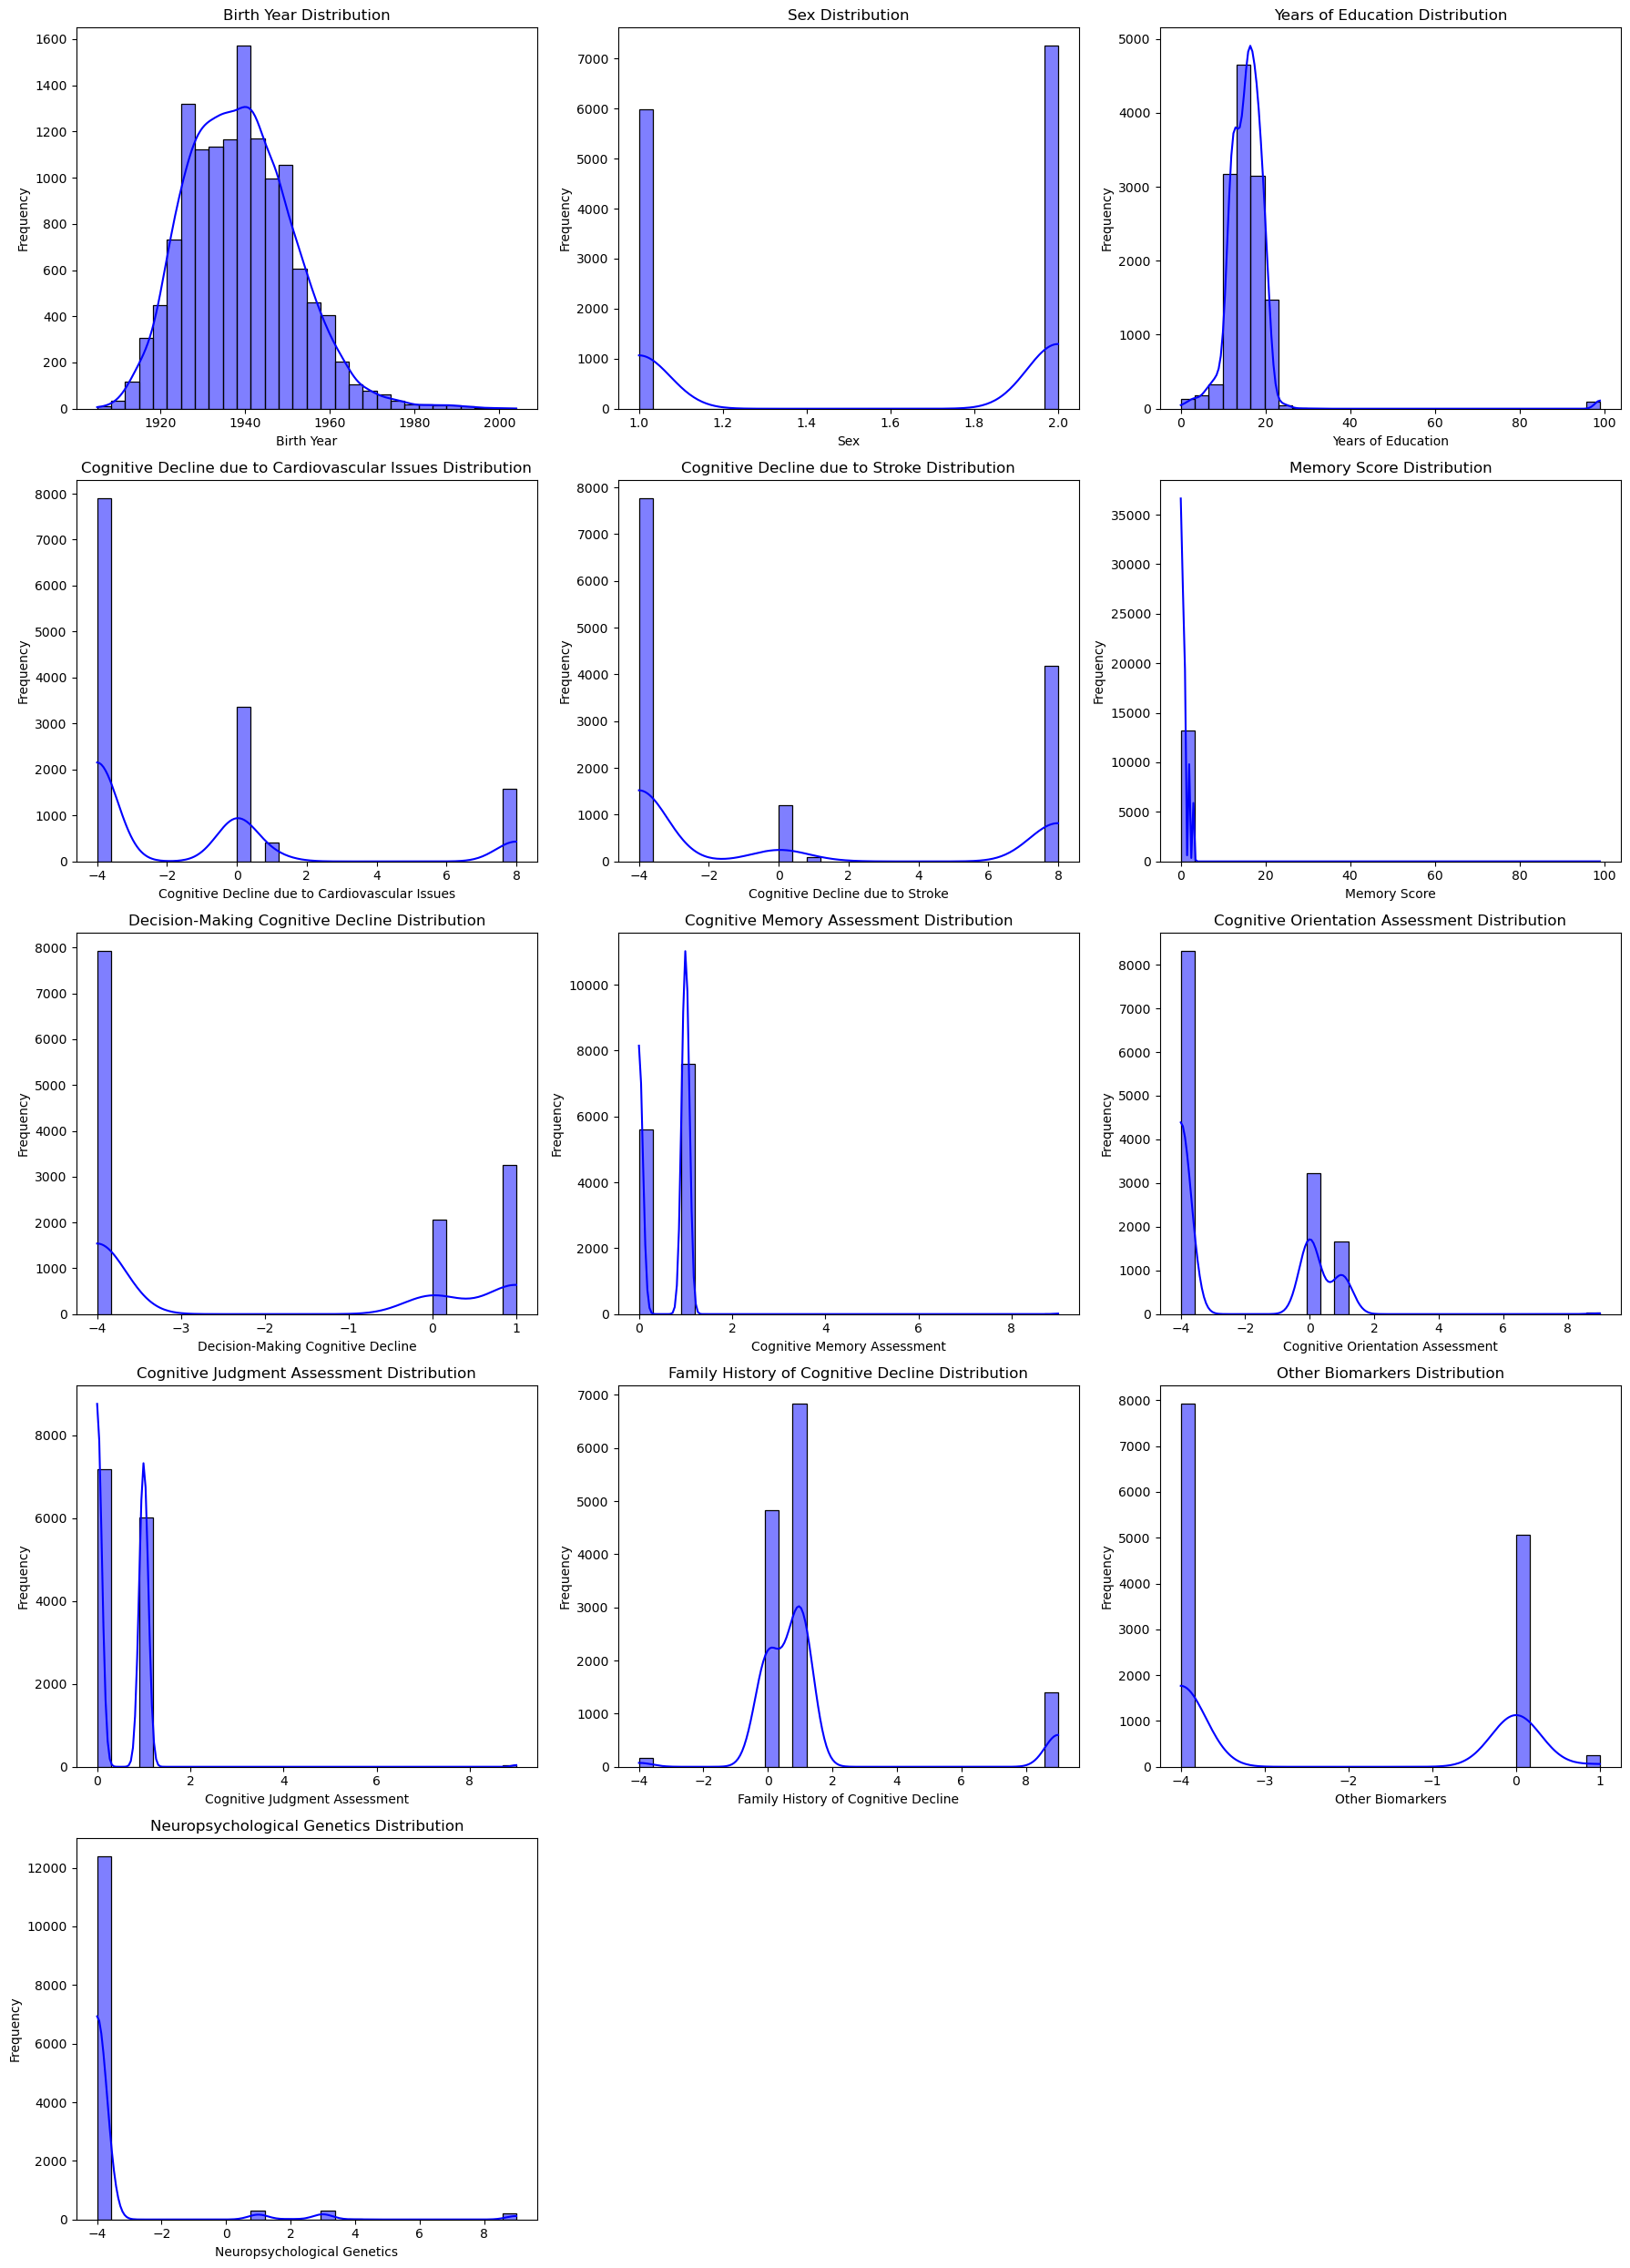

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical features
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Determine the grid size based on the number of numerical features
num_features = len(numerical_cols)
rows = math.ceil(num_features / 3)  # 3 columns per row

# Plot numerical variables
plt.figure(figsize=(18, rows * 5))  # Adjust height dynamically
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis

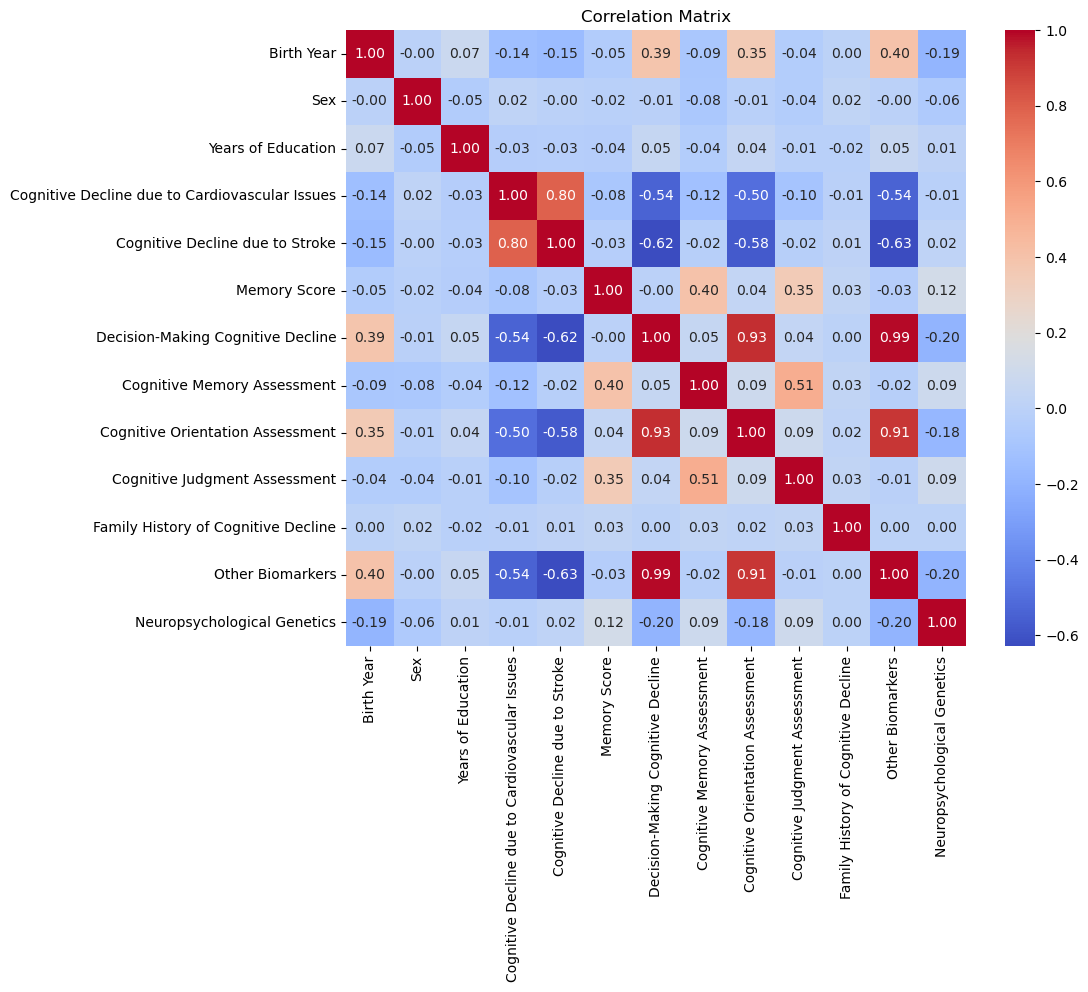

In [13]:
import seaborn as sns

# Correlation matrix to check relationships between features
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

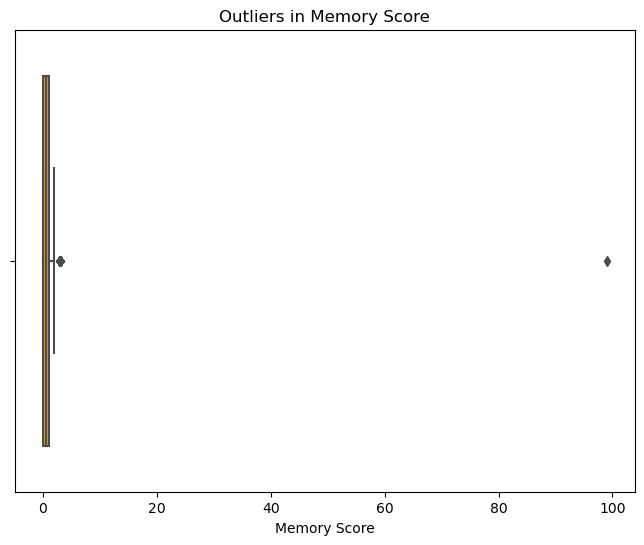

In [14]:
# Boxplot to detect outliers in memory score
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Memory Score'], color='orange')
plt.title('Outliers in Memory Score')
plt.show()

In [15]:
# Removing outliers using the IQR method for Memory Score
Q1 = df_cleaned['Memory Score'].quantile(0.25)
Q3 = df_cleaned['Memory Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers in the Memory Score
alzheimers_data_no_outliers = df_cleaned[
    (df_cleaned['Memory Score'] >= lower_bound) & 
    (df_cleaned['Memory Score'] <= upper_bound)
]

print(f"Original dataset size: {df_cleaned.shape[0]}")
print(f"Dataset size after outlier removal: {alzheimers_data_no_outliers.shape[0]}")


Original dataset size: 13236
Dataset size after outlier removal: 12428


In [16]:
from sklearn.impute import SimpleImputer

# Define the features and target variable after removing outliers
X = alzheimers_data_no_outliers.drop(columns=['Memory Score'])
y = alzheimers_data_no_outliers['Memory Score']

# Use the median to fill missing values
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the feature set
X_imputed = imputer.fit_transform(X)

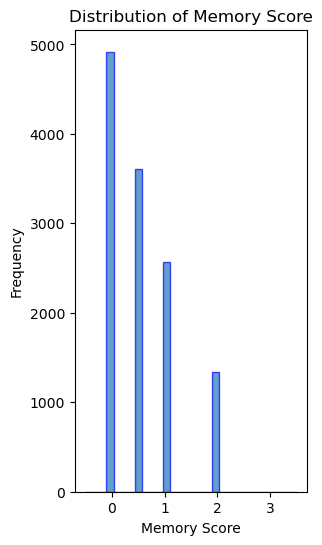

In [17]:
import matplotlib.pyplot as plt

# Confirming the range of Memory Score and adjusting the histogram
plt.figure(figsize=(3, 6))
plt.hist(alzheimers_data_no_outliers['Memory Score'], bins=30, range=(-0.5, 3.5), edgecolor='blue', alpha=0.7)
plt.title('Distribution of Memory Score')
plt.xlabel('Memory Score')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

Correlation with Memory Score:
Memory Score                                      1.000000
Cognitive Memory Assessment                       0.398785
Cognitive Judgment Assessment                     0.346163
Stroke_to_Decision_Ratio                          0.152966
Neuropsychological Genetics                       0.121781
Genetics_to_Age_Ratio                             0.121650
Cognitive Orientation Assessment                  0.038284
Family History of Cognitive Decline               0.031432
Decision-Making Cognitive Decline                -0.001524
Sex                                              -0.015292
Biomarker_to_Age_Ratio                           -0.023148
Cognitive Decline due to Stroke                  -0.029957
Other Biomarkers                                 -0.034151
Years of Education                               -0.036310
Education_to_Age_Ratio                           -0.044053
Birth Year                                       -0.049076
Cardiovascular_to_Age_Rat

/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_95068/751195803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Education_to_Age_Ratio'] = df_cleaned['Years of Education'] / (2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
/var/folders/ww/3_fjkv0x29ggs63lp0s_hx2c0000gn/T/ipykernel_95068/751195803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cardiovascular_to_Age_Ratio'] = df_cleaned['Cognitive Decline due to Cardiovascular Issues'] / (
/var/folde

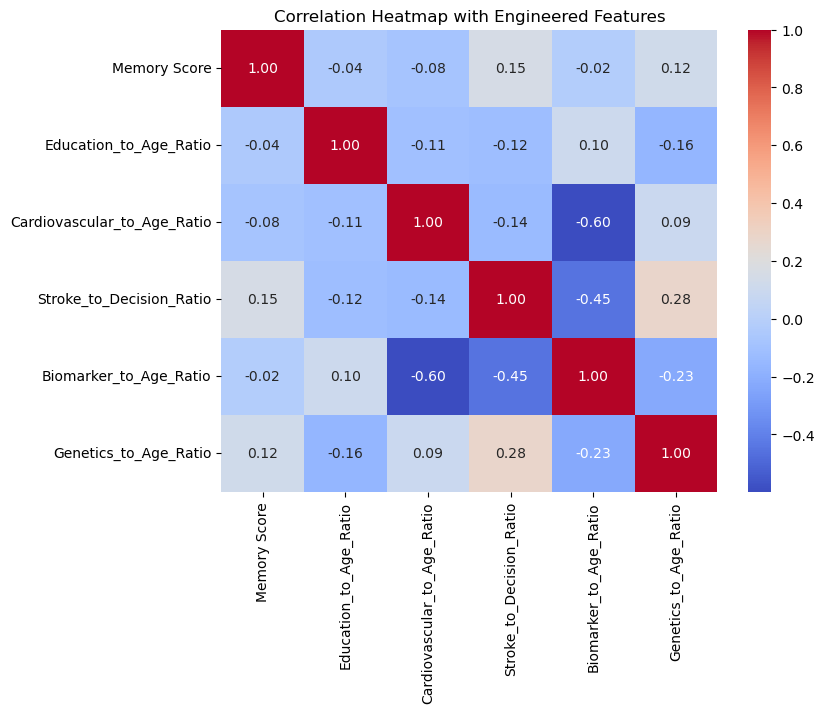

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_cleaned is the cleaned dataset from previous steps

# Step 1: Create Feature Ratios
df_cleaned['Education_to_Age_Ratio'] = df_cleaned['Years of Education'] / (2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Cardiovascular_to_Age_Ratio'] = df_cleaned['Cognitive Decline due to Cardiovascular Issues'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Stroke_to_Decision_Ratio'] = df_cleaned['Cognitive Decline due to Stroke'] / (
    df_cleaned['Decision-Making Cognitive Decline'] + 1)  # Avoid division by zero
df_cleaned['Biomarker_to_Age_Ratio'] = df_cleaned['Other Biomarkers'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero
df_cleaned['Genetics_to_Age_Ratio'] = df_cleaned['Neuropsychological Genetics'] / (
    2024 - df_cleaned['Birth Year'] + 1)  # Avoid division by zero

# Step 2: Check Correlations with Memory Score
correlations = df_cleaned.corr()['Memory Score'].sort_values(ascending=False)
print("Correlation with Memory Score:")
print(correlations)

# Step 3: Plot Correlation Heatmap for Engineered Features
plt.figure(figsize=(8, 6))
engineered_features = [
    'Memory Score', 'Education_to_Age_Ratio', 'Cardiovascular_to_Age_Ratio',
    'Stroke_to_Decision_Ratio', 'Biomarker_to_Age_Ratio', 'Genetics_to_Age_Ratio'
]
sns.heatmap(df_cleaned[engineered_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Engineered Features')
plt.show()



In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


# Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Output the evaluation results
print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R² Score: {r2_lr}")


Linear Regression Mean Squared Error: 0.21813081372687795
Linear Regression R² Score: 0.4354711084415349


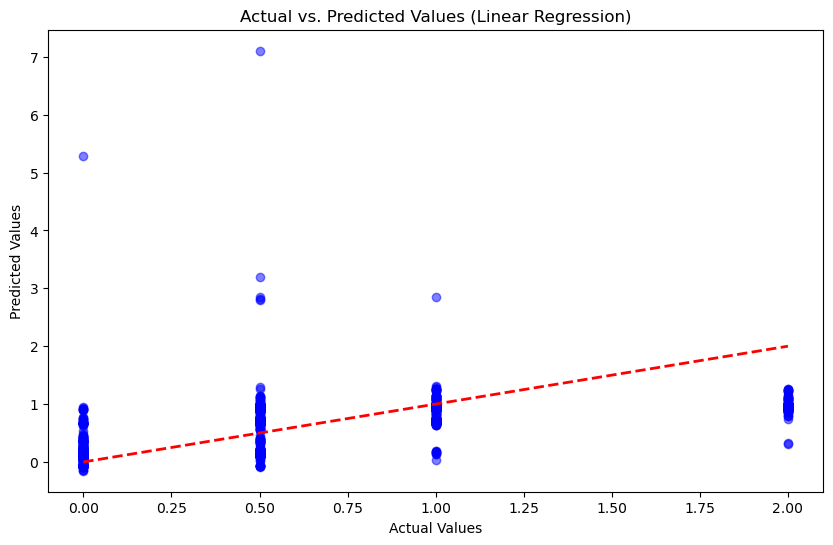

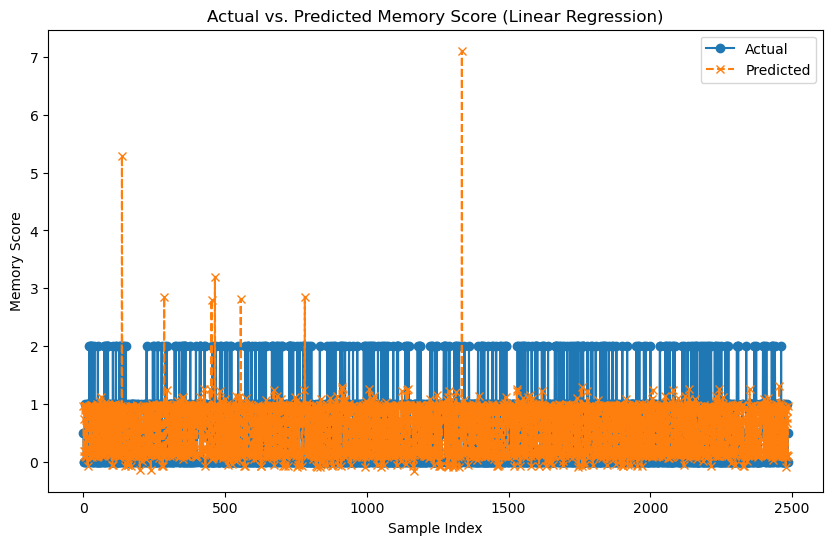

In [21]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.show()

# Line plot for actual and predicted values (sorted by index)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_lr, label='Predicted', marker='x', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Memory Score')
plt.title('Actual vs. Predicted Memory Score (Linear Regression)')
plt.legend()
plt.show()


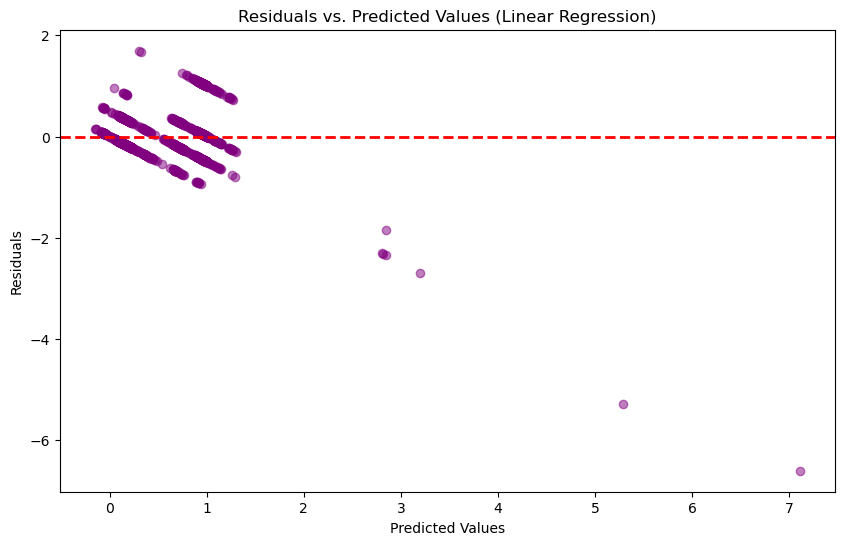

In [22]:
# Residual Plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Linear Regression)')
plt.show()



# Gradient Boosting Model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R² Score: {r2_gb}")

Gradient Boosting Mean Squared Error: 0.15088631922912912
Gradient Boosting R² Score: 0.6095018164081547


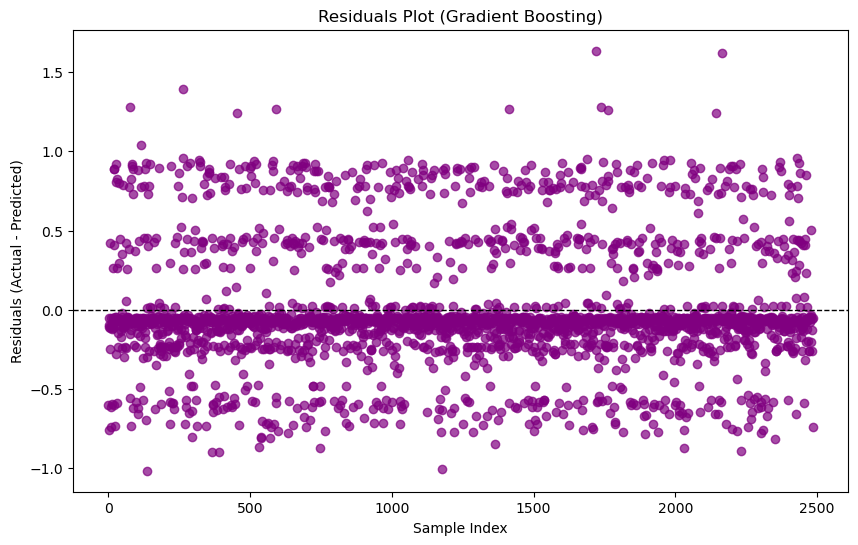

In [24]:
import matplotlib.pyplot as plt

# Residuals calculation
residuals_gb = y_test - y_pred_gb  # Replace with your actual and predicted values

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals_gb)), residuals_gb, color='purple', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals Plot (Gradient Boosting)')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


In [25]:
!pip install xgboost

In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


XGBoost Mean Squared Error: 0.16667277326268812
XGBoost R² Score: 0.5686460141263079


# Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")


Random Forest Mean Squared Error: 0.20138137021624128
Random Forest R² Score: 0.47881915550434084


# K-Nearest Neighbors (KNN) Model

In [28]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Step 1: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Step 3: Define the parameter grid for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'p': [1, 2]  # Distance metric: 1=Manhattan, 2=Euclidean
}

# Step 4: Set up GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, 
                               cv=5, n_jobs=-1, scoring='r2', verbose=1)

# Step 5: Fit the model
grid_search_knn.fit(X_train_scaled, y_train)

# Step 6: Get the best parameters and score
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best Cross-Validation R² Score for KNN: {grid_search_knn.best_score_}")

# Step 7: Predict on the test set using the best estimator
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_scaled)

# Step 8: Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Output the evaluation metrics
print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R² Score: {r2_knn}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation R² Score for KNN: 0.5752664637205849
KNN Mean Squared Error: 0.16121887508318186
KNN R² Score: 0.582760861273967


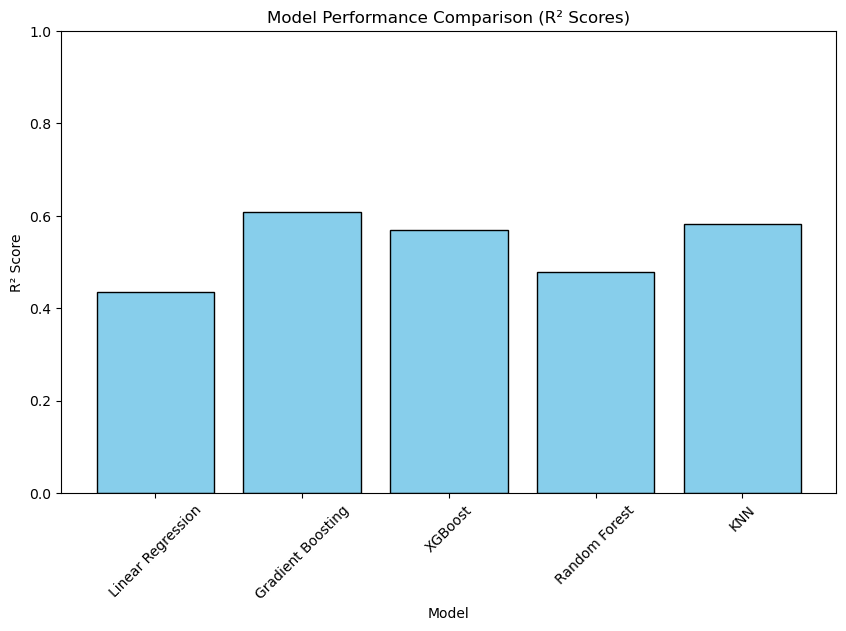

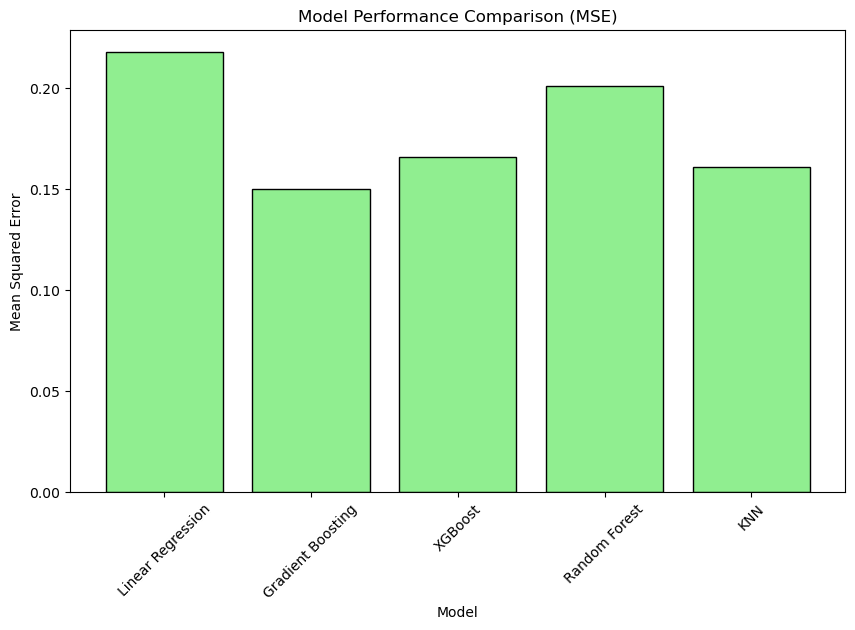

In [29]:
# Consolidating model metrics for visualization
# Replace placeholder values with actual metrics from your notebook
model_metrics = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'XGBoost', 'Random Forest', 'KNN'],
    'MSE': [0.218, 0.150, 0.166, 0.201, 0.161],  # Replace with actual MSE values
    'R2': [0.435, 0.609, 0.568, 0.478, 0.582]    # Replace with actual R² values
}

# Convert to DataFrame
import pandas as pd
import matplotlib.pyplot as plt

model_performance_df = pd.DataFrame(model_metrics)

# Plotting R² Scores
plt.figure(figsize=(10, 6))
plt.bar(model_performance_df['Model'], model_performance_df['R2'], color='skyblue', edgecolor='black')
plt.title('Model Performance Comparison (R² Scores)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # R² ranges between 0 and 1
plt.xticks(rotation=45)
plt.show()

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.bar(model_performance_df['Model'], model_performance_df['MSE'], color='lightgreen', edgecolor='black')
plt.title('Model Performance Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

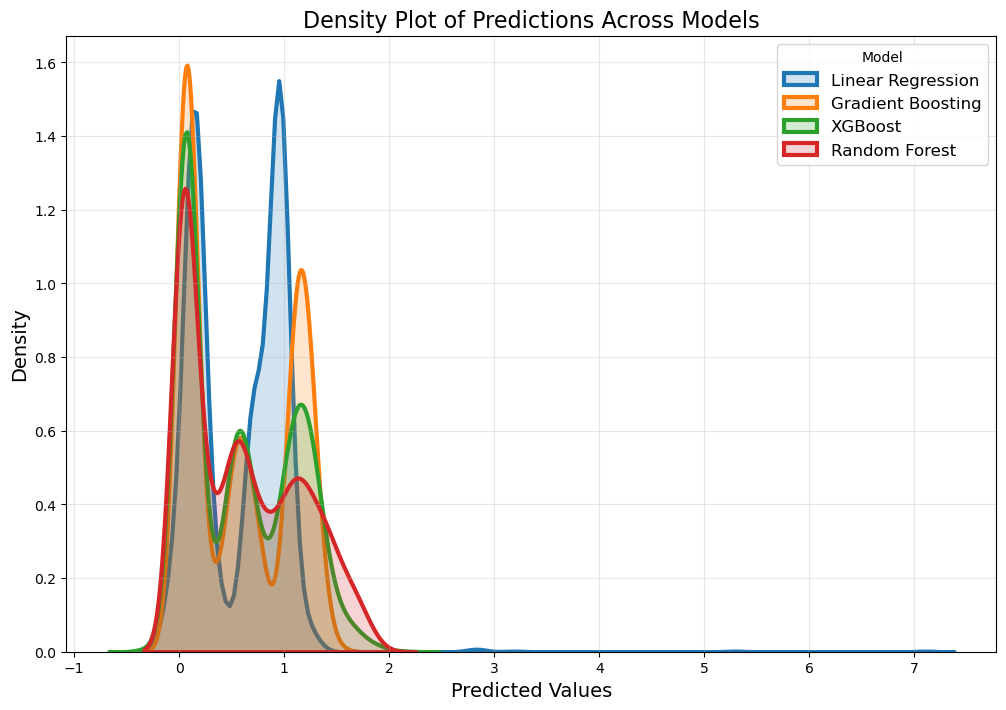

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example predicted values for demonstration
# Replace these with your actual model predictions
predicted_values = {
    'Linear Regression': y_pred_lr,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb,
    'Random Forest': y_pred_rf,
    
}

# Ensure predictions are valid arrays or lists before plotting
plt.figure(figsize=(12, 8))
for model_name, predictions in predicted_values.items():
    sns.kdeplot(predictions, label=model_name, fill=True, alpha=0.2, linewidth=3)

# Adding title and labels for clarity
plt.title('Density Plot of Predictions Across Models', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [31]:
#Gradient Boosting (orange curve): This model has a narrower and more focused peak, indicating more consistent predictions with less variability.
#Random Forest (green curve): Shows a slightly wider spread, but still relatively consistent predictions.
#XGBoost and KNN: These models appear to have more dispersed predictions, indicating less precision.
#Based on the graph, Gradient Boosting seems to be the best model as it provides more concentrated predictions, likely reflecting greater accuracy and reliability. However, the final decision should also consider numerical metrics like R² and MSE.

# Hyperparameter Tuning

# Tuning Gradient Boosting with GridSearchCV

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                              cv=5, n_jobs=-1, scoring='r2', verbose=1)

# Fit the model with grid search
gb_grid_search.fit(X_train, y_train)

# Print the best parameters and best score for Gradient Boosting
print(f"Best Parameters for Gradient Boosting: {gb_grid_search.best_params_}")
print(f"Best R² Score for Gradient Boosting: {gb_grid_search.best_score_}")

# Predicted on the test set using the best Gradient Boosting model
y_pred_gb_tuned = gb_grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned Gradient Boosting model
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Tuned Gradient Boosting Mean Squared Error: {mse_gb_tuned}")
print(f"Tuned Gradient Boosting R² Score: {r2_gb_tuned}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best R² Score for Gradient Boosting: 0.6224357304548922
Tuned Gradient Boosting Mean Squared Error: 0.1504745092386075
Tuned Gradient Boosting R² Score: 0.61056759264357


# Tuning Gradient Boosting with RandomizedSearchCV

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
gb_param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Randomly choose between 100 to 1000 estimators
    'learning_rate': [0.001, 0.01, 0.05, 0.1],  # Range of learning rates
    'max_depth': np.arange(3, 10, 1),  # Range for maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],  # Subsampling ratios
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples at a leaf node
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_param_grid, 
                                   n_iter=50,  # Perform 50 iterations of random parameter selection
                                   cv=5, 
                                   random_state=42, 
                                   n_jobs=-1, 
                                   scoring='r2', 
                                   verbose=1)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters from RandomizedSearchCV: {random_search.best_params_}")
print(f"Best R² Score from RandomizedSearchCV: {random_search.best_score_}")

# Predict on the test set using the best model
y_pred_gb_tuned = random_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Tuned Gradient Boosting Mean Squared Error: {mse_gb_tuned}")
print(f"Tuned Gradient Boosting R² Score: {r2_gb_tuned}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05}
Best R² Score from RandomizedSearchCV: 0.6218669815547727
Tuned Gradient Boosting Mean Squared Error: 0.1501208010997146
Tuned Gradient Boosting R² Score: 0.6114829995967317


In [34]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [35]:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Bayesian Optimization
param_grid = {
    'n_estimators': (100, 1000),               # Number of trees in the forest
    'learning_rate': (0.001, 0.1, 'log-uniform'),  # Learning rate
    'max_depth': (3, 10),                      # Maximum depth of trees
    'subsample': (0.6, 1.0),                   # Fraction of samples used to fit each tree
    'min_samples_split': (2, 20),              # Minimum samples to split an internal node
    'min_samples_leaf': (1, 10)                # Minimum samples at a leaf node
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize Bayesian Optimization with BayesSearchCV
opt = BayesSearchCV(
    estimator=gb_model,
    search_spaces=param_grid,
    n_iter=50,  # Number of parameter settings to try
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all cores
    random_state=42,
    scoring='r2',  # Optimize for R² score
    verbose=1
)

# Fit the Bayesian Optimization
opt.fit(X_train, y_train)

# Output the best parameters and the corresponding R² score
print(f"Best Parameters from Bayesian Optimization: {opt.best_params_}")
print(f"Best R² Score from Bayesian Optimization: {opt.best_score_}")

# Predict on the test set using the best-tuned model
y_pred_gb_tuned = opt.best_estimator_.predict(X_test)

# Evaluate the tuned model
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print(f"Tuned Gradient Boosting Mean Squared Error: {mse_gb_tuned}")
print(f"Tuned Gradient Boosting R² Score: {r2_gb_tuned}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Predict on the test set using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the tuned model
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Tuned XGBoost Mean Squared Error: {mse_best_xgb}")
print(f"Tuned XGBoost R² Score: {r2_best_xgb}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Tuned XGBoost Mean Squared Error: 0.15043988245948012
Tuned XGBoost R² Score: 0.6106572077552777


# Combining Models

In [37]:
# Gradient Boosting and Random forest
# Set weights for each model based on performance
weight_gb = 0.6  # 60% weight for Gradient Boosting
weight_rf = 0.4  # 40% weight for Random Forest

# Weighted average of predictions
y_pred_weighted_ensemble = (weight_gb * y_pred_gb) + (weight_rf * y_pred_rf)

# Evaluate the weighted ensemble model
mse_weighted_ensemble = mean_squared_error(y_test, y_pred_weighted_ensemble)
r2_weighted_ensemble = r2_score(y_test, y_pred_weighted_ensemble)

print(f"Weighted Ensemble Model Mean Squared Error: {mse_weighted_ensemble}")
print(f"Weighted Ensemble Model R² Score: {r2_weighted_ensemble}")


Weighted Ensemble Model Mean Squared Error: 0.16254902649905423
Weighted Ensemble Model R² Score: 0.5793183907143167


In [38]:
# Gradient Boosting and XGboost
# Define weights for each model
weight_gb = 0.6
weight_xgb = 0.4

# Weighted average of predictions
y_pred_ensemble_weighted = (weight_gb * y_pred_gb) + (weight_xgb * y_pred_xgb)

# Evaluate the weighted ensemble model
mse_ensemble_weighted = mean_squared_error(y_test, y_pred_ensemble_weighted)
r2_ensemble_weighted = r2_score(y_test, y_pred_ensemble_weighted)

print(f"Ensemble Model (Weighted Averaging) Mean Squared Error: {mse_ensemble_weighted}")
print(f"Ensemble Model (Weighted Averaging) R² Score: {r2_ensemble_weighted}")



Ensemble Model (Weighted Averaging) Mean Squared Error: 0.1532658753666383
Ensemble Model (Weighted Averaging) R² Score: 0.6033434559007247


# k-fold cross-validation

In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

# Define K-Fold Cross-Validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use the best model from RandomizedSearchCV
best_gb_model = random_search.best_estimator_

# Define a custom scoring function (R² Score in this case)
scoring_function = make_scorer(r2_score)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=kf, scoring=scoring_function)

# Print the results
print(f"K-Fold R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean()}")
print(f"Standard Deviation of R² Scores: {cv_scores.std()}")




K-Fold R² Scores: [0.59720768 0.62616397 0.63662521 0.63760774 0.60988282]
Mean R² Score: 0.6214974830669551
Standard Deviation of R² Scores: 0.015716611391961142


# Feature Importance

Top 10 Features Important for Alzheimer's Prediction:
                                           Feature  Importance
6                      Cognitive Memory Assessment    0.780212
8                    Cognitive Judgment Assessment    0.137991
7                 Cognitive Orientation Assessment    0.031056
5                Decision-Making Cognitive Decline    0.012748
0                                       Birth Year    0.010885
10                                Other Biomarkers    0.009993
2                               Years of Education    0.007530
11                     Neuropsychological Genetics    0.004510
9              Family History of Cognitive Decline    0.002466
3   Cognitive Decline due to Cardiovascular Issues    0.001274


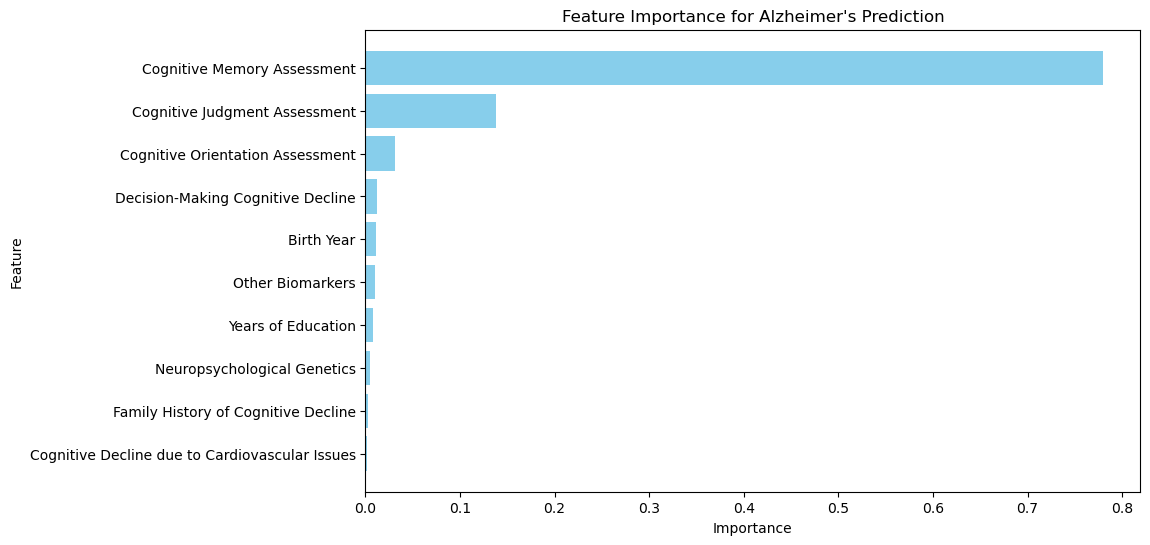

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure X_train has the feature names
if isinstance(X_train, np.ndarray):  # Check if it's a NumPy array
    X_train = pd.DataFrame(X_train, columns=X.columns)  # Convert to DataFrame

# Extract Feature Importances from the best Gradient Boosting model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Feature names
    'Importance': random_search.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the Top 10 Features
print("Top 10 Features Important for Alzheimer's Prediction:")
print(feature_importances.head(10))

# Plot the Top Features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.title('Feature Importance for Alzheimer\'s Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()




In [45]:
import joblib

# Save the model
joblib.dump(random_search, 'gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")


Model saved as 'gradient_boosting_model.pkl'
